<a href="https://colab.research.google.com/github/sabbirahmedalamin/AI/blob/main/Sabbir_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes (1).csv to diabetes (1).csv


In [ ]:
!pip install --upgrade pip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip install imbalanced-learn

In [ ]:
pip install tensorflow

In [ ]:
pip install scikeras

In [ ]:
pip install xgboost

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import time

from imblearn.over_sampling import SMOTE
from collections import Counter
import itertools

from sklearn.tree import DecisionTreeClassifier
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout,Activation,BatchNormalization
from scikeras import wrappers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc as auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score,cross_val_predict, cross_validate
from sklearn.metrics import make_scorer,precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
file_path =("/content/diabetes (1).csv")
df = pd.read_csv(file_path)
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [ ]:
if 'id' in df.columns:
    df = df.drop(['id'], axis=1)

df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.tail(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

EDA

EDA END

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

num_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])


df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

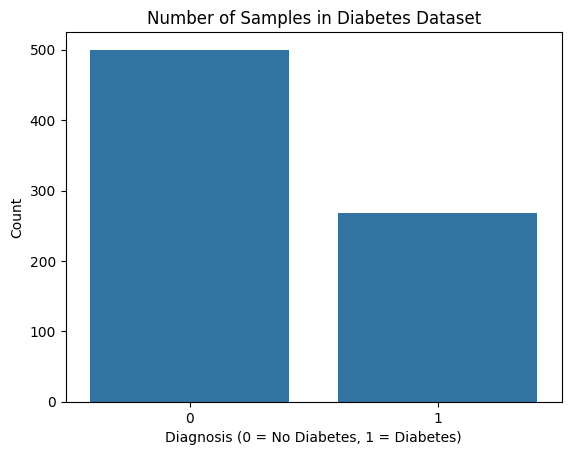

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Outcome', data=df)
plt.title('Number of Samples in Diabetes Dataset')
plt.xlabel('Diagnosis (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')

plt.savefig('Number_of_samples_Diabetes_Dataset.pdf', bbox_inches='tight')

plt.show()

In [ ]:
X = df.drop(columns=['Outcome'])

y = df['Outcome']

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      0.0  33.6   
1            1     85.0           66.0           29.0      0.0  26.6   
2            8    183.0           64.0            0.0      0.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df_encoded = df.copy()

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print(X.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      0.0  33.6   
1            1     85.0           66.0           29.0      0.0  26.6   
2            8    183.0           64.0            0.0      0.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      0.0  33.6   
1            1     85.0           66.0           29.0      0.0  26.6   
2            8    183.0           64.0            0.0      0.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      0.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            0.0      0.0  30.1   
767            1     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [ ]:
num_cols = df.shape[1]

print("Number of columns:", num_cols)


Number of columns: 9


In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Numeric columns:", num_cols.tolist())
print("Number of numeric columns:", len(num_cols))


Numeric columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Number of numeric columns: 9


Column: Pregnancies
Skew : 0.9


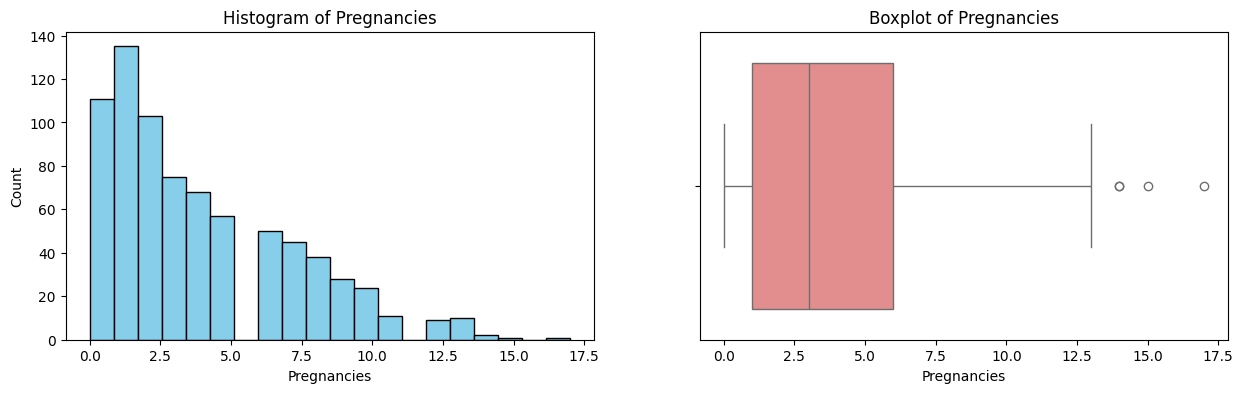

--------------------------------------------------
Column: Glucose
Skew : 0.17


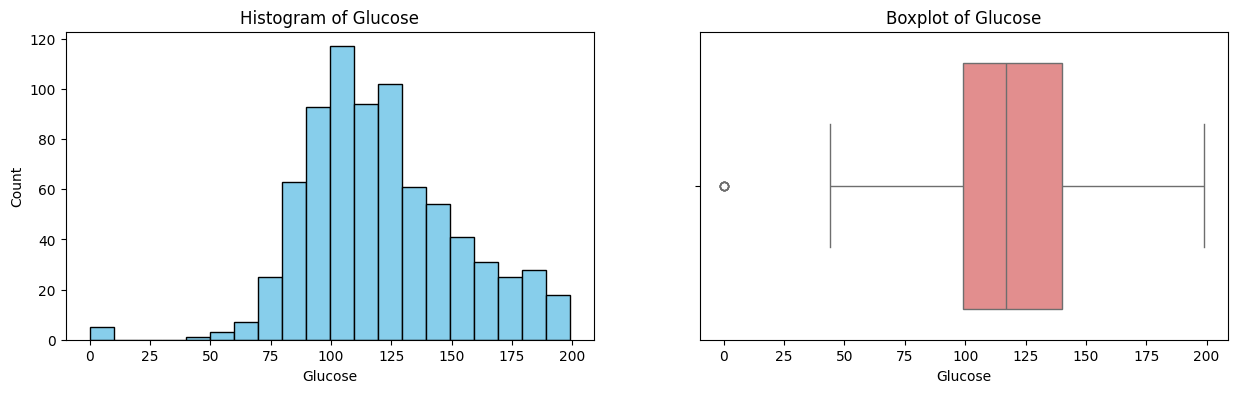

--------------------------------------------------
Column: BloodPressure
Skew : -1.84


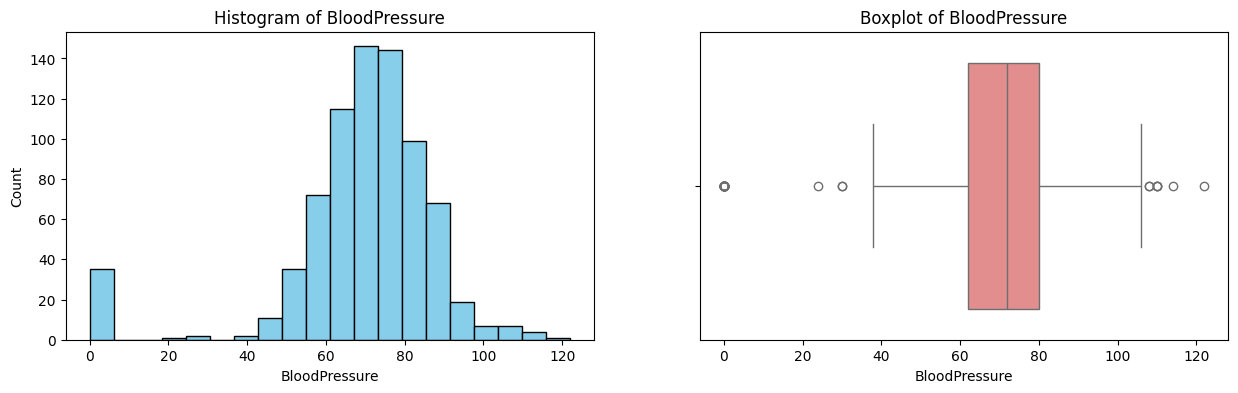

--------------------------------------------------
Column: SkinThickness
Skew : 0.11


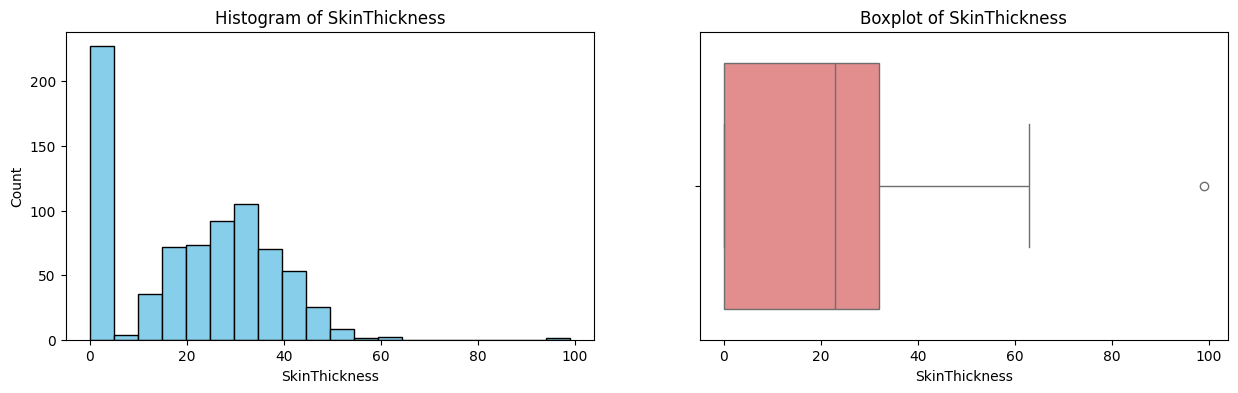

--------------------------------------------------
Column: Insulin
Skew : 2.27


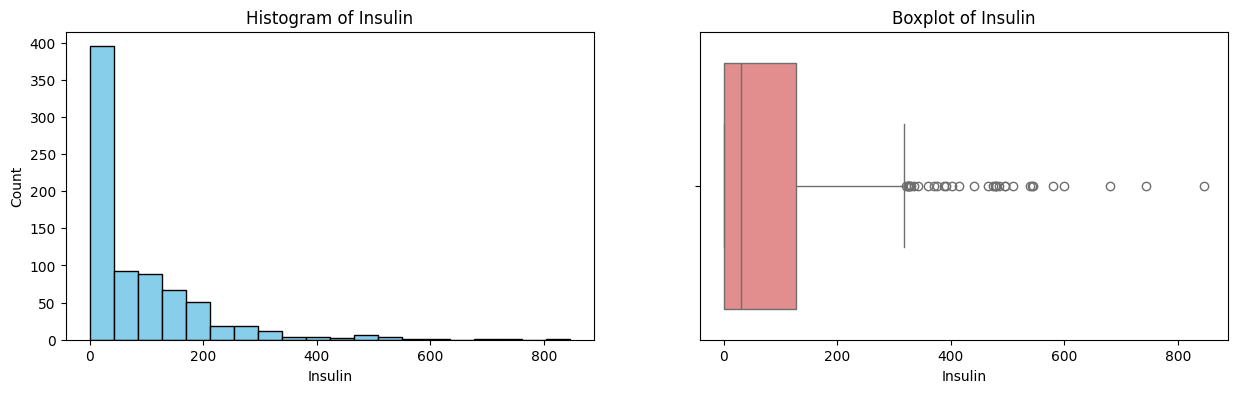

--------------------------------------------------
Column: BMI
Skew : -0.43


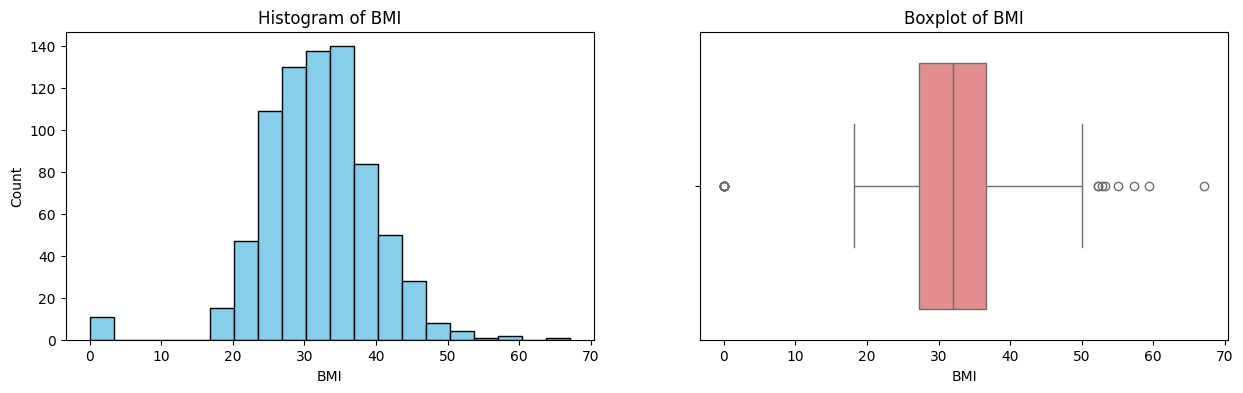

--------------------------------------------------
Column: DiabetesPedigreeFunction
Skew : 1.92


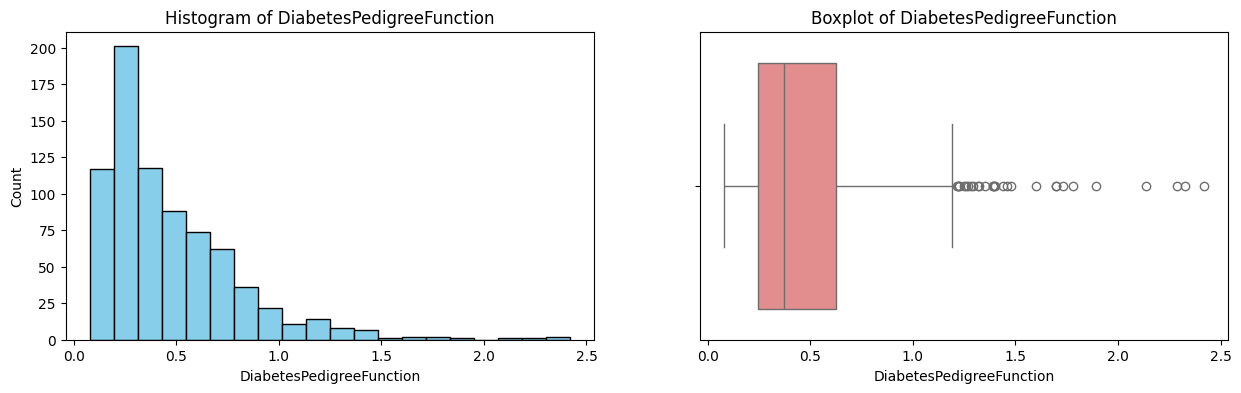

--------------------------------------------------
Column: Age
Skew : 1.13


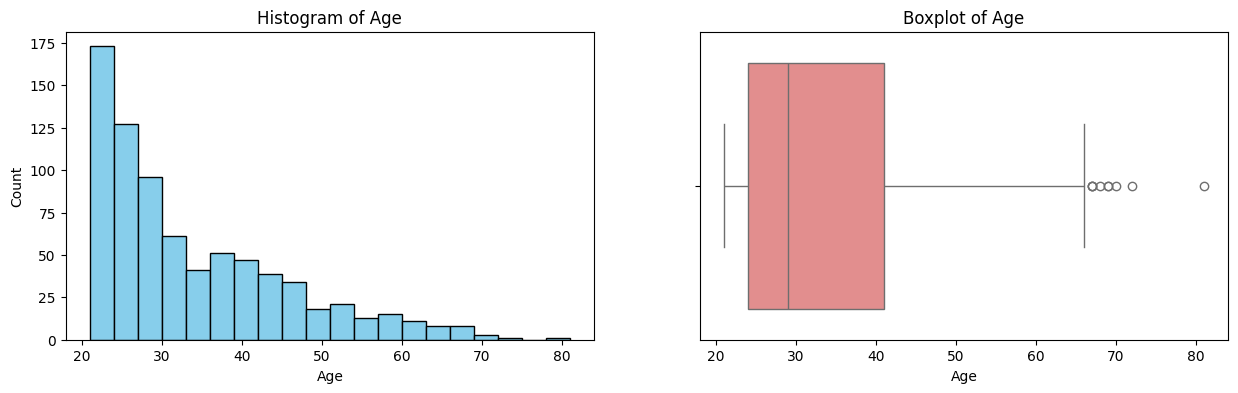

--------------------------------------------------
Column: Outcome
Skew : 0.64


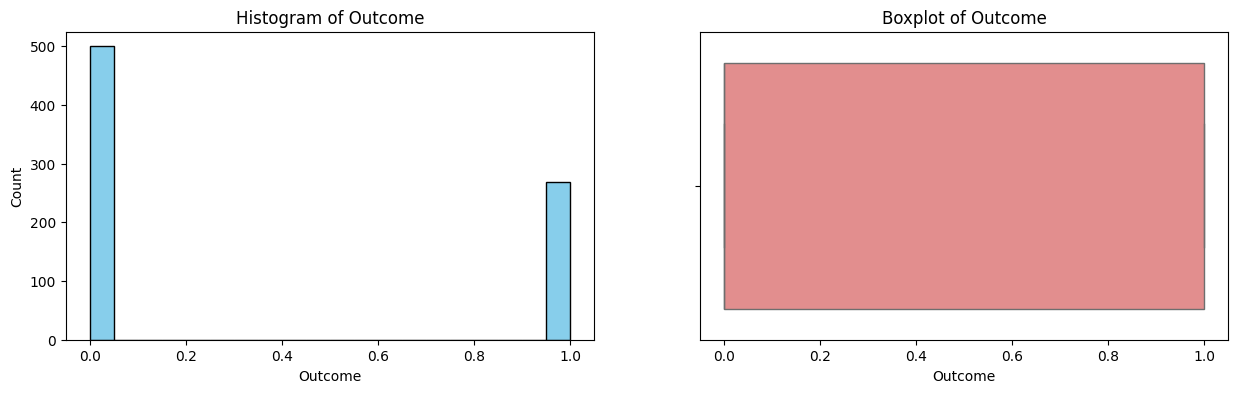

--------------------------------------------------


In [ ]:
for col in num_cols:
    print(f"Column: {col}")
    print("Skew :", round(df[col].skew(), 2))

    plt.figure(figsize=(15, 4))

    plt.subplot(1, 2, 1)
    df[col].hist(grid=False, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')

    plt.show()
    print("-" * 50)


In [ ]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)
print(y.value_counts())


Shape of X (features): (768, 8)
Shape of y (target): (768,)
Outcome
0    500
1    268
Name: count, dtype: int64


In [ ]:
x = df.drop(columns=['Outcome'])
y = df['Outcome']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# X and y
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

X_train[cols_with_zeros] = X_train[cols_with_zeros].replace(0, np.nan)
X_test[cols_with_zeros] = X_test[cols_with_zeros].replace(0, np.nan)

imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", acc)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.7857142857142857

Confusion Matrix:
[[87 13]
 [20 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Random Forest Classification Metrics on Diabetes Dataset\n")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}\n")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Random Forest Classification Metrics on Diabetes Dataset

Accuracy  : 0.7857
Precision : 0.7234
Recall    : 0.6296
F1 Score  : 0.6733

Confusion Matrix:
[[87 13]
 [20 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Classification Metrics on Diabetes Dataset\n")
print(f"Accuracy  : {accuracy_dt:.4f}")
print(f"Precision : {precision_dt:.4f}")
print(f"Recall    : {recall_dt:.4f}")
print(f"F1 Score  : {f1_dt:.4f}\n")

cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(cm_dt)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Metrics on Diabetes Dataset

Accuracy  : 0.6688
Precision : 0.5333
Recall    : 0.4444
F1 Score  : 0.4848

Confusion Matrix:
[[79 21]
 [30 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.79      0.76       100
           1       0.53      0.44      0.48        54

    accuracy                           0.67       154
   macro avg       0.63      0.62      0.62       154
weighted avg       0.66      0.67      0.66       154



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("K-Nearest Neighbors Classification Metrics on Diabetes Dataset\n")
print(f"Accuracy  : {accuracy_knn:.4f}")
print(f"Precision : {precision_knn:.4f}")
print(f"Recall    : {recall_knn:.4f}")
print(f"F1 Score  : {f1_knn:.4f}\n")

cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm_knn)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Classification Metrics on Diabetes Dataset

Accuracy  : 0.7403
Precision : 0.6296
Recall    : 0.6296
F1 Score  : 0.6296

Confusion Matrix:
[[80 20]
 [20 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       100
           1       0.63      0.63      0.63        54

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Classification Metrics on Diabetes Dataset\n")
print(f"Accuracy  : {accuracy_lr:.4f}")
print(f"Precision : {precision_lr:.4f}")
print(f"Recall    : {recall_lr:.4f}")
print(f"F1 Score  : {f1_lr:.4f}\n")

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(cm_lr)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Classification Metrics on Diabetes Dataset

Accuracy  : 0.6948
Precision : 0.5778
Recall    : 0.4815
F1 Score  : 0.5253

Confusion Matrix:
[[81 19]
 [28 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

adaboost_model = AdaBoostClassifier(random_state=42, n_estimators=100)
adaboost_model.fit(X_train, y_train)
y_pred_ada = adaboost_model.predict(X_test)

accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)

print("AdaBoost Classification Metrics on Diabetes Dataset\n")
print(f"Accuracy  : {accuracy_ada:.4f}")
print(f"Precision : {precision_ada:.4f}")
print(f"Recall    : {recall_ada:.4f}")
print(f"F1 Score  : {f1_ada:.4f}\n")

cm_ada = confusion_matrix(y_test, y_pred_ada)
print("Confusion Matrix:")
print(cm_ada)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada))


AdaBoost Classification Metrics on Diabetes Dataset

Accuracy  : 0.7597
Precision : 0.6809
Recall    : 0.5926
F1 Score  : 0.6337

Confusion Matrix:
[[85 15]
 [22 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



Naive Bais

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)


accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("Gaussian Naive Bayes Classification Metrics on Diabetes Dataset\n")
print(f"Accuracy  : {accuracy_nb:.4f}")
print(f"Precision : {precision_nb:.4f}")
print(f"Recall    : {recall_nb:.4f}")
print(f"F1 Score  : {f1_nb:.4f}\n")

cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(cm_nb)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))


Gaussian Naive Bayes Classification Metrics on Diabetes Dataset

Accuracy  : 0.6948
Precision : 0.5574
Recall    : 0.6296
F1 Score  : 0.5913

Confusion Matrix:
[[73 27]
 [20 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       100
           1       0.56      0.63      0.59        54

    accuracy                           0.69       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.71      0.69      0.70       154



SVM


In [ ]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Metrics")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm):.4f}")


SVM Metrics
Accuracy: 0.7403
Precision: 0.6591
Recall: 0.5370
F1 Score: 0.5918


XGBoost


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Metrics")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:45:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Metrics
Accuracy: 0.7468
Precision: 0.6531
Recall: 0.5926
F1 Score: 0.6214


ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")

print("ANN Metrics")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ann):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_ann):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_ann):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_ann):.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.4522 - loss: 0.7259 - val_accuracy: 0.6623 - val_loss: 0.6286
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7645 - loss: 0.5824 - val_accuracy: 0.7143 - val_loss: 0.5633
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7389 - loss: 0.5464 - val_accuracy: 0.7078 - val_loss: 0.5283
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7814 - loss: 0.5125 - val_accuracy: 0.6883 - val_loss: 0.5152
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7855 - loss: 0.4690 - val_accuracy: 0.6948 - val_loss: 0.5098
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7671 - loss: 0.4632 - val_accuracy: 0.6948 - val_loss: 0.5120
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7688 - loss: 0.4574 - val_accuracy: 0.6883 - val_loss: 0.5170
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7876 - loss: 0.4534 - val_accuracy: 0.6948 - v

LSTM

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train_lstm = X_train.to_numpy().reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm  = X_test.to_numpy().reshape((X_test.shape[0], 1, X_test.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1, activation='sigmoid'))   # Binary output

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=1)

y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype(int)

# Metrics
print("===== LSTM Model =====")
print("Accuracy :", accuracy_score(y_test, y_pred_lstm))
print("Precision:", precision_score(y_test, y_pred_lstm))
print("Recall   :", recall_score(y_test, y_pred_lstm))
print("F1 Score :", f1_score(y_test, y_pred_lstm))


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5935 - loss: 0.6812
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7367 - loss: 0.6404
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7373 - loss: 0.6042
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7488 - loss: 0.5782
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7643 - loss: 0.5407
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7625 - loss: 0.5209
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7452 - loss: 0.5087
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7739 - loss: 0.4775
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7769 - loss: 0.4745
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7461 - loss: 0.4855
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7938 - loss: 0.4474
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7853 - loss:

RNN

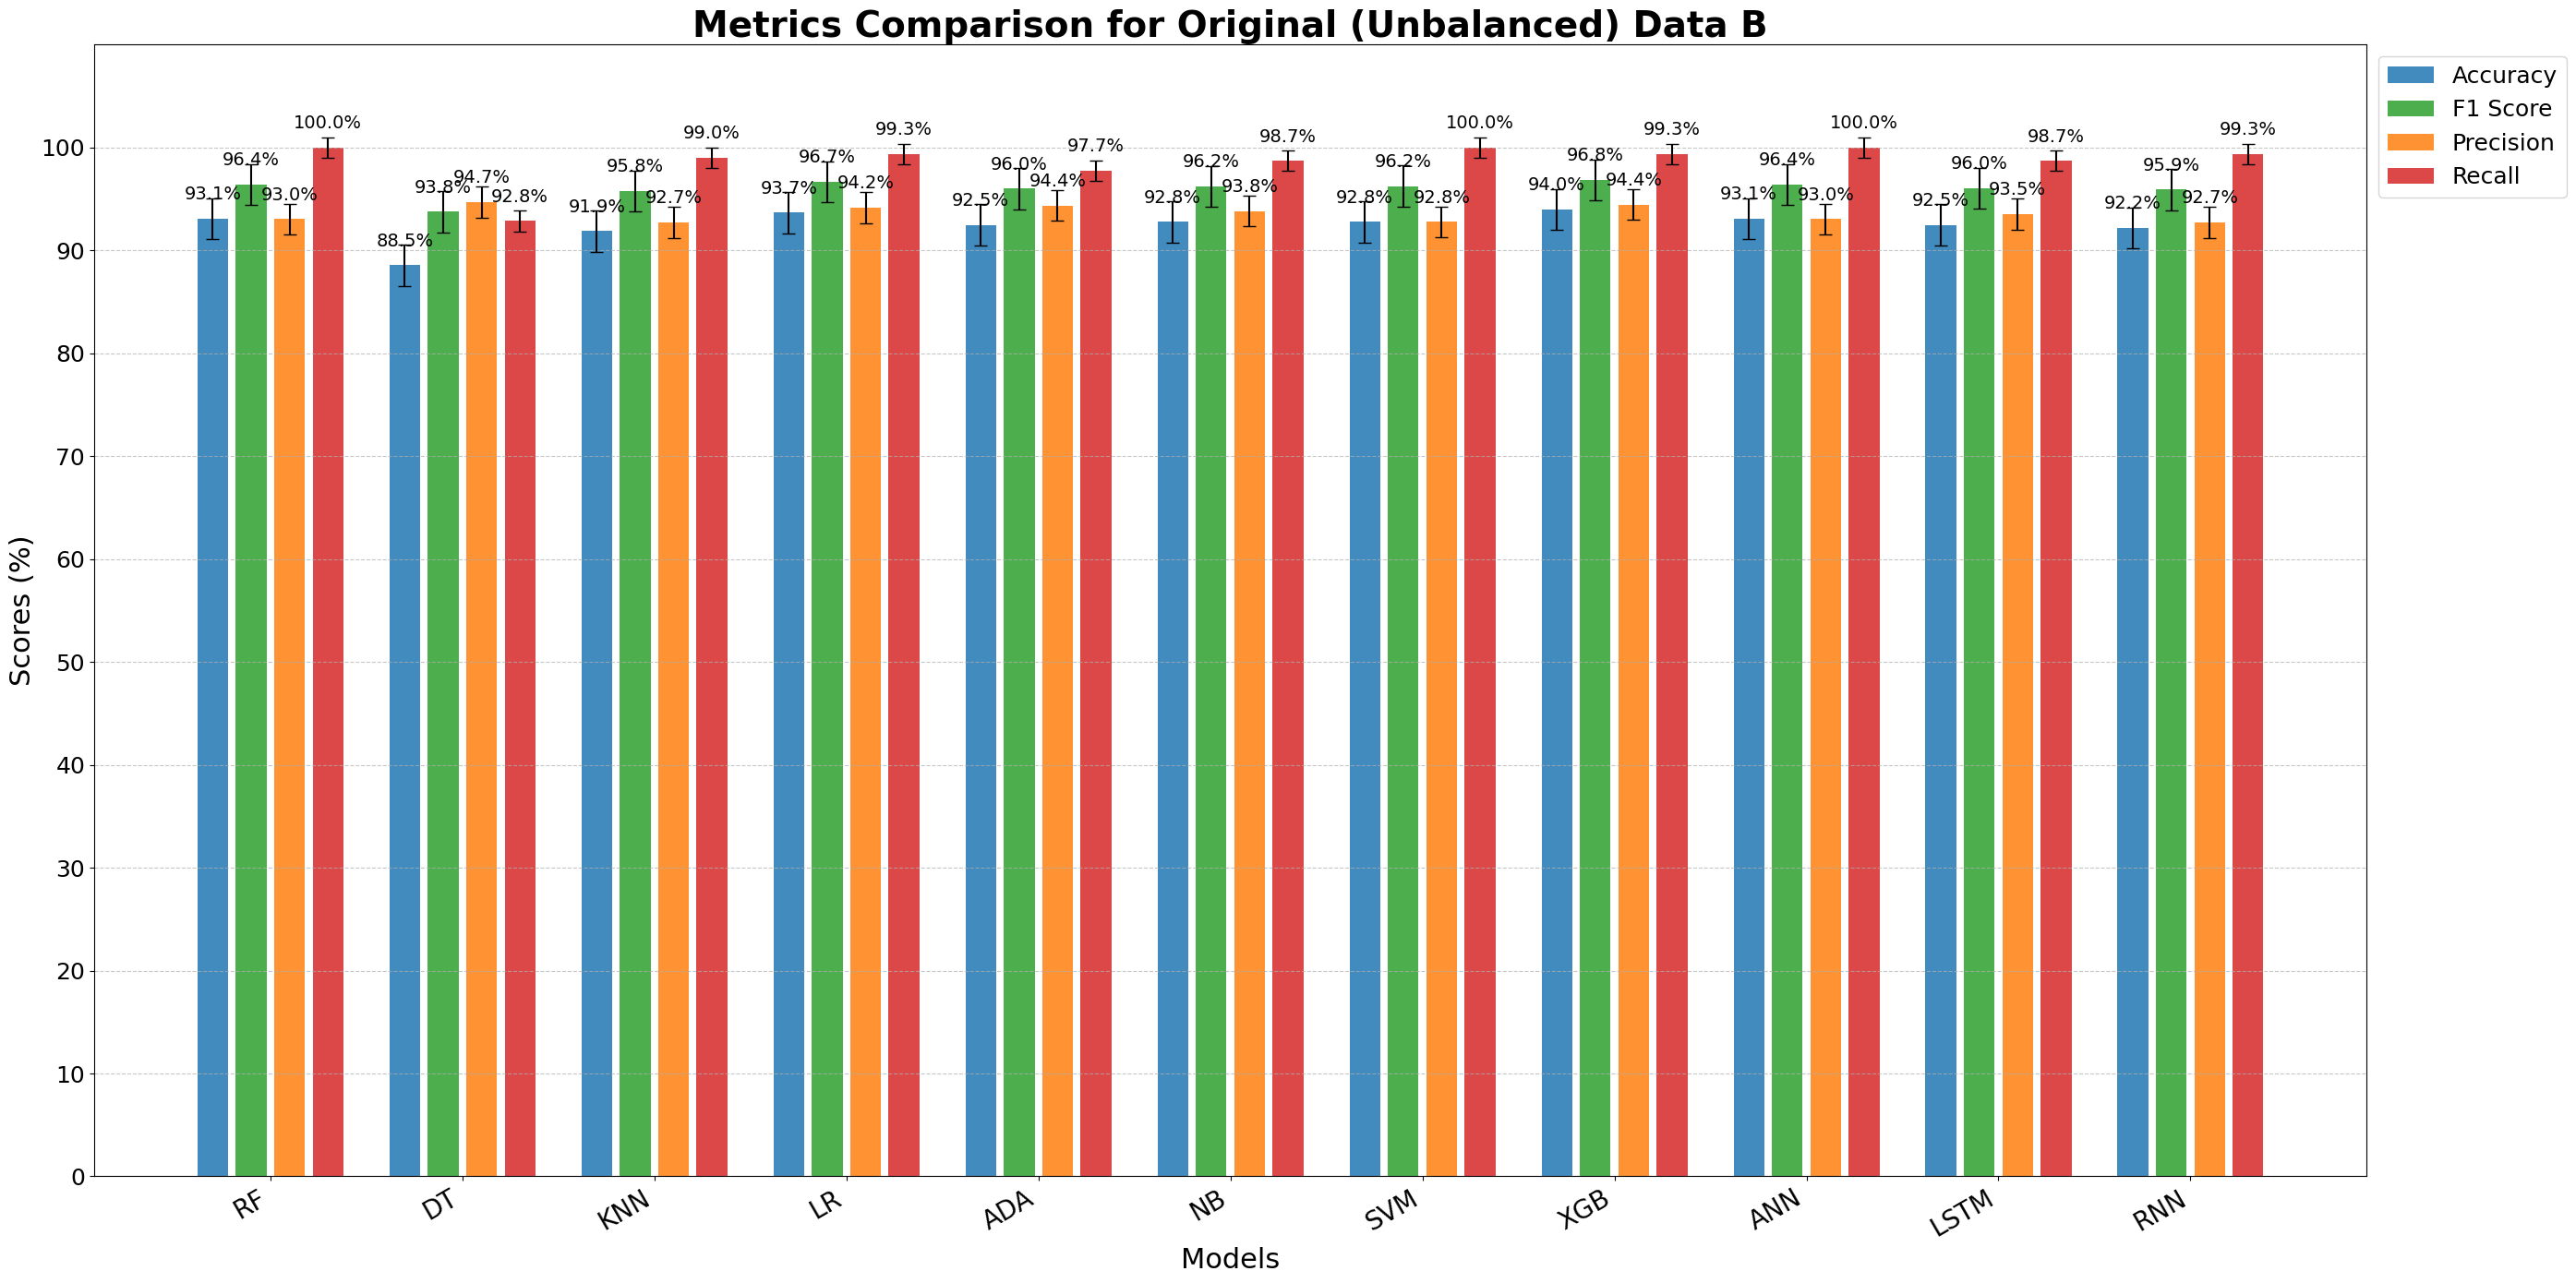

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN']

accuracy = [93.07, 88.55, 91.87, 93.67, 92.47, 92.77, 92.77, 93.98, 93.07, 92.47, 92.17]
precision = [93.05, 94.70, 92.71, 94.15, 94.36, 93.82, 92.77, 94.44, 93.05, 93.54, 92.73]
recall = [100.0, 92.85, 99.02, 99.35, 97.72, 98.70, 100.0, 99.35, 100.0, 98.70, 99.35]
f1_score = [96.40, 93.77, 95.76, 96.68, 96.01, 96.20, 96.25, 96.83, 96.40, 96.05, 95.92]

error_accuracies = [2]*11
error_precisions = [1.5]*11
error_recalls = [1]*11
error_f1_scores = [2]*11

metrics = [accuracy, f1_score, precision, recall]
metrics_labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
metrics_errors = [error_accuracies, error_f1_scores, error_precisions, error_recalls]
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']

x_pos = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(28, 14))

for i, (metric, label, errors, color) in enumerate(zip(metrics, metrics_labels, metrics_errors, colors)):
    bar = ax.bar(x_pos + i * width, metric, width * 0.8, yerr=errors,
                 label=label, alpha=0.85, ecolor='black', capsize=5, color=color)

    for rect, value in zip(bar, metric):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height + 1.5,
                f'{value:.1f}%', ha='center', va='bottom', fontsize=14)

ax.set_title('Metrics Comparison for Original (Unbalanced) Data B', fontsize=28, weight='bold')
ax.set_xlabel('Models', fontsize=22)
ax.set_ylabel('Scores (%)', fontsize=22)
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(models, fontsize=20, rotation=30, ha='right')
ax.set_ylim(0, 110)
ax.set_yticks(np.arange(0, 110, 10))
ax.tick_params(axis='y', labelsize=18)
ax.legend(fontsize=18, loc='upper left', bbox_to_anchor=(1, 1))
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('Metrics_Comparison.pdf', bbox_inches='tight')
plt.show()


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


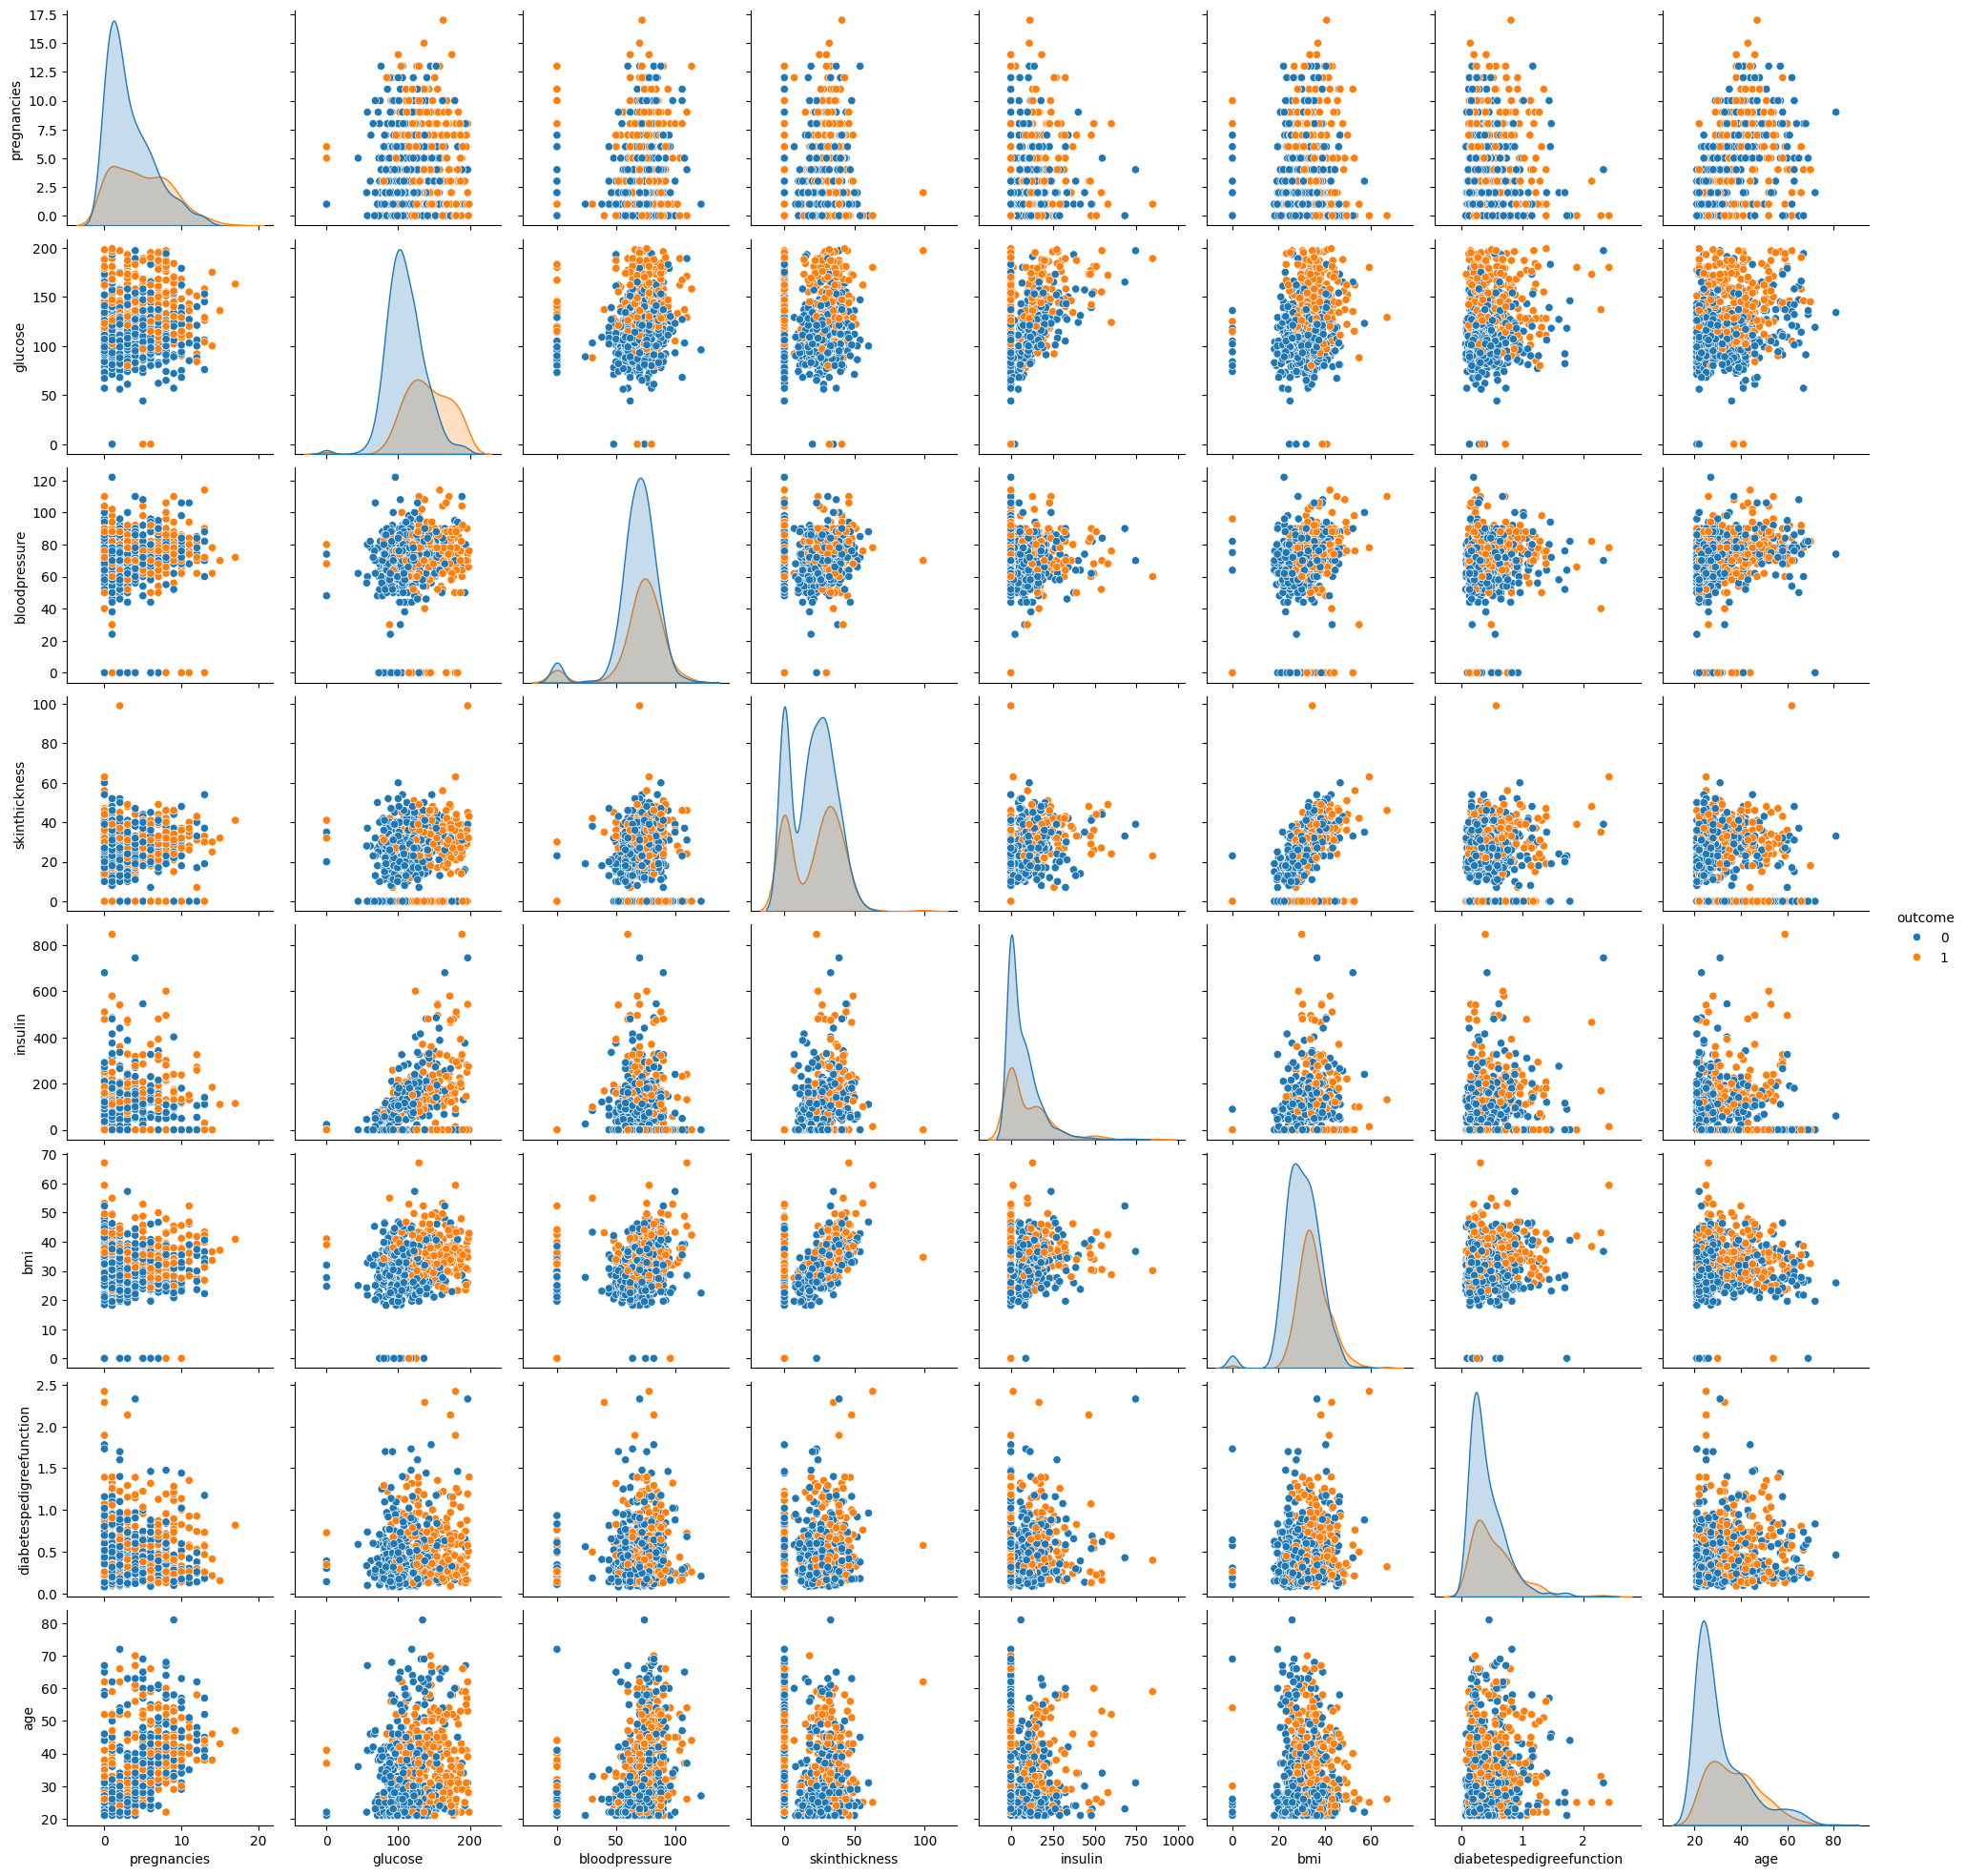

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='outcome')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(21, 21), dpi=700)

fig = sns.heatmap(
    corr,
    mask=mask,
    vmin=-0.1, vmax=1.0,
    annot=True, fmt=".2f",
    cmap='coolwarm',
    square=True, linewidths=0.9,
    cbar_kws={"shrink":0.6, "pad":0.01}
)

cust_labels = df.columns.tolist()
fig.set_yticklabels(cust_labels, rotation=0)
fig.set_xticklabels(cust_labels, rotation=90)
fig.tick_params(axis='both', which='both', length=0)

plt.title("Correlation for Features Of Dataset A", fontsize=14)

plt.savefig("Correlation_for_Features_Of_Dataset_A.pdf", bbox_inches='tight')
plt.show()


Gain Ratio

In [ ]:
X_res = df.drop(columns=['outcome'])
y_res = df['outcome']


In [ ]:
import pandas as pd
import numpy as np

X_res = df.drop(columns=['outcome'])
y_res = df['outcome']

def entropy(y):
    value_counts = y.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

def information_gain(X, y, feature):
    base_entropy = entropy(y)
    feature_entropy = 0
    for value in X[feature].unique():
        subset = y[X[feature] == value]
        feature_entropy += len(subset) / len(X) * entropy(subset)
    return base_entropy - feature_entropy

def split_information(X, feature):
    value_counts = X[feature].value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

def gain_ratio(X, y, feature):
    ig = information_gain(X, y, feature)
    si = split_information(X, feature)
    return ig / (si + 1e-9)

gain_ratios = {feature: gain_ratio(X_res, y_res, feature) for feature in X_res.columns}

gain_ratio_results = pd.DataFrame(gain_ratios.items(), columns=['Feature', 'Gain Ratio'])
gain_ratio_results = gain_ratio_results.sort_values(by="Gain Ratio", ascending=False)

print(gain_ratio_results)


                    Feature  Gain Ratio
6  diabetespedigreefunction    0.073729
4                   insulin    0.059188
5                       bmi    0.045275
1                   glucose    0.045060
7                       age    0.028026
3             skinthickness    0.017809
0               pregnancies    0.017755
2             bloodpressure    0.012376


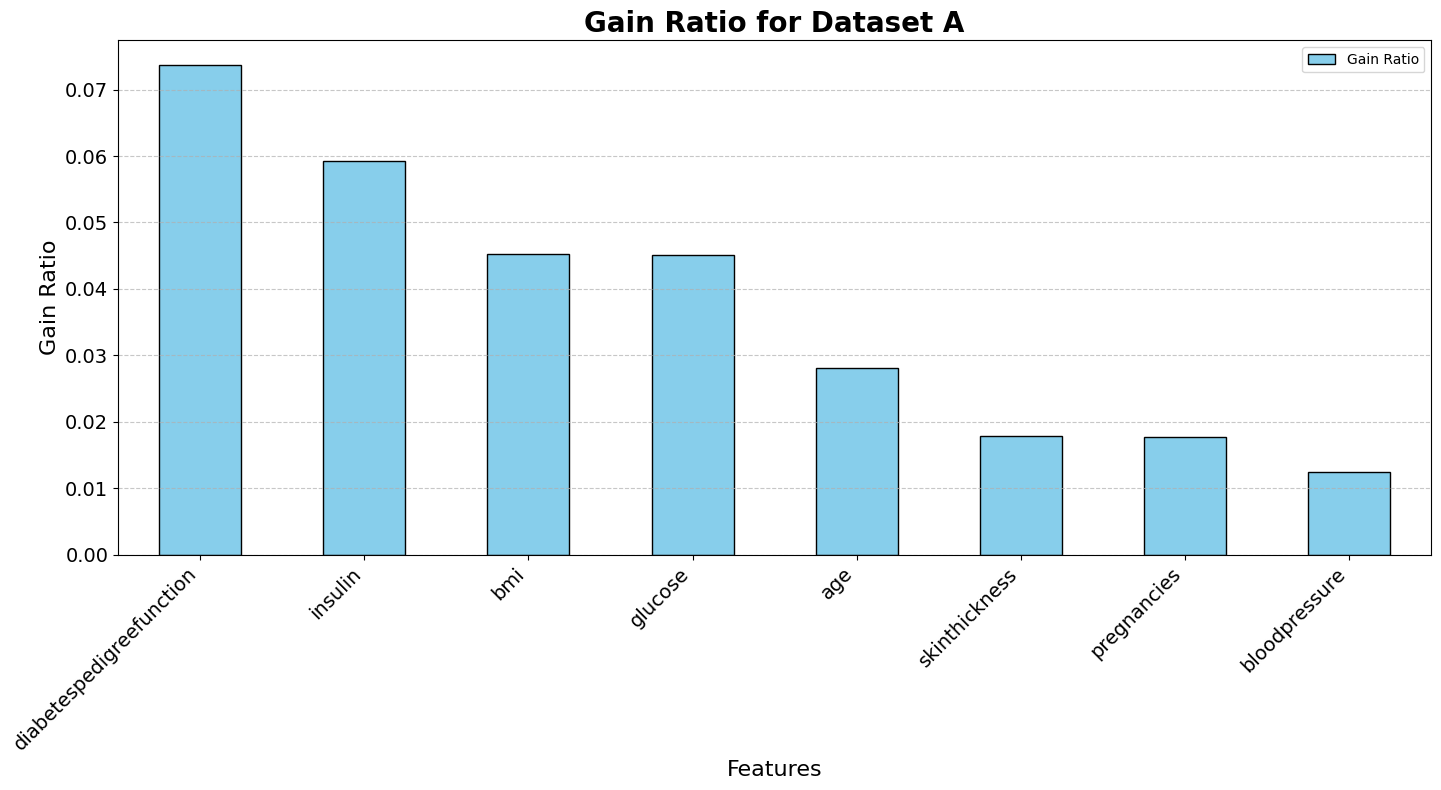

In [ ]:
plt.figure(figsize=(28, 8))
ax1 = plt.subplot(1, 2, 1)
gain_ratio_results.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax1)
ax1.set_title('Gain Ratio for Dataset A', fontsize=20, fontweight='bold')
ax1.set_xlabel('Features', fontsize=16)
ax1.set_ylabel('Gain Ratio', fontsize=16)
ax1.set_xticklabels(gain_ratio_results['Feature'], rotation=45, ha='right', fontsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("Gain Ratio for Dataset A.pdf")
plt.show()


Information Gain

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

def entropy(y_res):
    value_counts = y_res.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

def information_gain(X_res, y_res, feature):
    base_entropy = entropy(y_res)
    feature_entropy = 0
    for value in X_res[feature].unique():
        subset = y_res[X_res[feature] == value]
        feature_entropy += len(subset) / len(X_res) * entropy(subset)
    return base_entropy - feature_entropy

information_gains = {feature: information_gain(X_res, y_res, feature) for feature in X_res.columns}

information_gain_results = pd.DataFrame(information_gains.items(), columns=['Feature', 'Information Gain'])
information_gain_results = information_gain_results.sort_values(by="Information Gain", ascending=False)

print(information_gain_results)


                    Feature  Information Gain
6  diabetespedigreefunction          0.650918
5                       bmi          0.343811
1                   glucose          0.304201
4                   insulin          0.277095
7                       age          0.140941
3             skinthickness          0.081664
0               pregnancies          0.061825
2             bloodpressure          0.059310


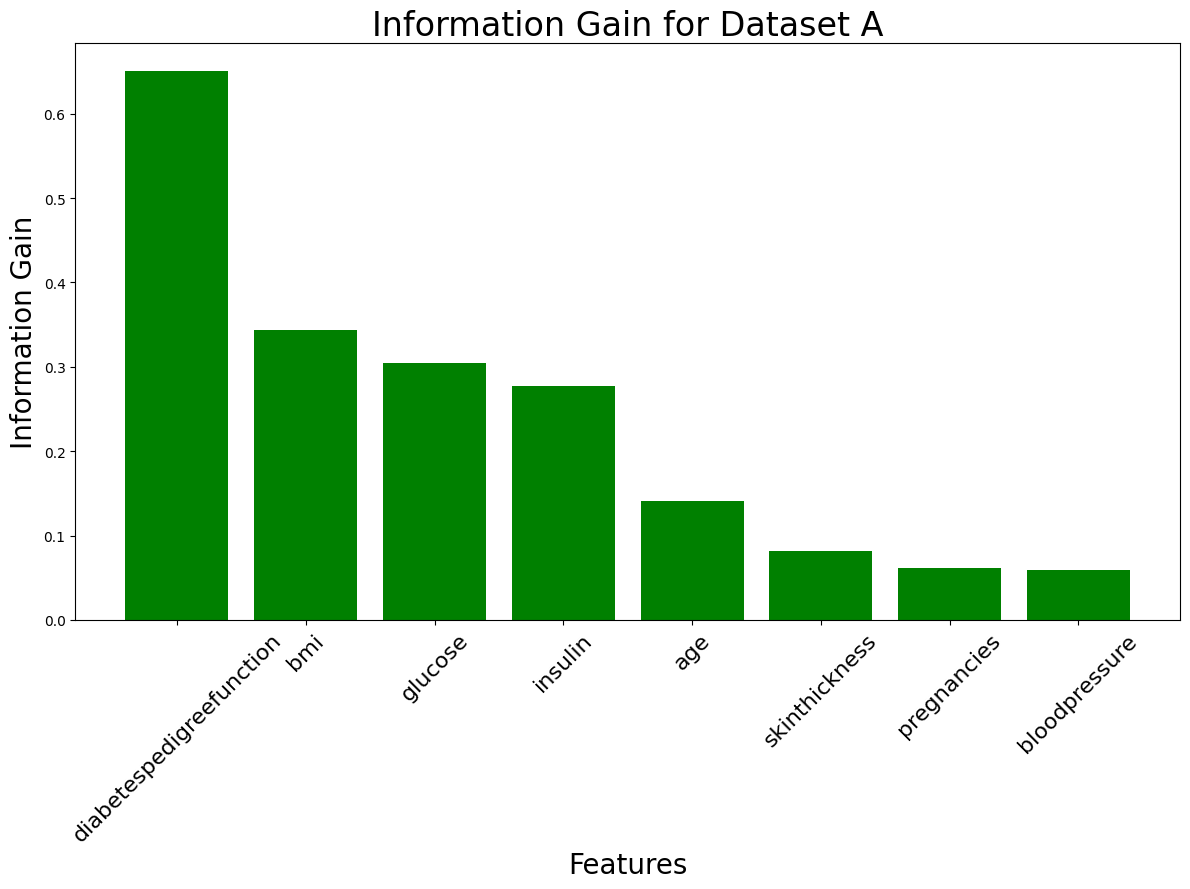

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

information_gains = {feature: information_gain(X_res, y_res, feature) for feature in X_res.columns}
information_gain_results = pd.DataFrame(information_gains.items(), columns=['Feature', 'IG'])
information_gain_results = information_gain_results.sort_values(by="IG", ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.bar(information_gain_results['Feature'], information_gain_results['IG'], color='green')
plt.xlabel('Features', fontsize=20)
plt.xticks(fontsize=16, rotation=45)
plt.ylabel('Information Gain', fontsize=20)
plt.title('Information Gain for Dataset A', fontsize=24)
plt.tight_layout()

plt.savefig("Information Gain for Dataset A.pdf", bbox_inches='tight')

plt.show()
